In [2]:
import sys
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd

dataset_train = pd.read_csv('formatted_128714.csv')
print(dataset_train.head)
training_set = dataset_train.iloc[:, 5:6]
training_set.dropna(inplace=True)
training_set_open = dataset_train.iloc[:, 3:4].values

dataset_train = pd.read_csv('formatted_128714.csv')
copy = pd.read_csv('formatted_128714.csv')
dataset_train = dataset_train[['DATE','OP', 'CLS']]
days = []

from datetime import datetime, timedelta

for i in range (1773):
    s = str(dataset_train.loc[i,'DATE'])
    # you could also import date instead of datetime and use that.
    date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    days.append(date.weekday())
    dataset_train.loc[i,'DATE'] = date.date()
    
dataset_train['DAY'] = days

<bound method NDFrame.head of       INS      DATE      OP     HIG     LOW     CLS       VOL          TOVR  \
0       0  20120315  143.00  143.50  142.75  143.00     88306  1.260000e+07   
1       0  20120316  143.00  143.75  142.50  142.50   1809319  2.590000e+08   
2       0  20120319  143.00  144.50  143.00  144.50     83707  1.200000e+07   
3       0  20120320  146.75  147.50  146.75  146.75     69571  1.020000e+07   
4       0  20120321  143.00  146.25  143.00  146.25      1434  2.063400e+05   
5       0  20120322  143.00  146.25  139.50  139.50    217090  3.060000e+07   
6       0  20120323  140.25  141.00  140.25  141.00    209291  2.950000e+07   
7       0  20120326  145.75  145.75  141.25  143.00     70148  1.010000e+07   
8       0  20120327  146.50  147.25  146.50  146.75    225697  3.310000e+07   
9       0  20120328  147.50  148.50  147.50    0.00     19061  2.812176e+06   
10      0  20120329  151.75  153.75  150.50    0.00     87931  1.340000e+07   
11      0  20120330  1

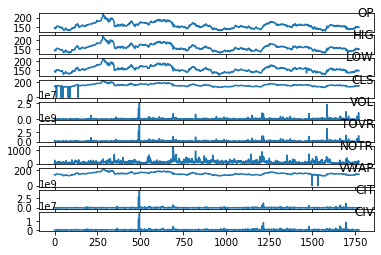

In [3]:
# load dataset
dataset = pd.read_csv('formatted_128714.csv', header=0, index_col=0)
values = dataset.values
# specify columns to plot
groups = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
i = 1
# plot each column
plt.figure()
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(values[:, group])
    plt.title(dataset.columns[group], y=0.5, loc='right')
    i += 1
plt.show()

In [5]:
from sklearn.preprocessing import MinMaxScaler

dataset = pd.read_csv('formatted_128714.csv')
copy = pd.read_csv('formatted_128714.csv')
dataset = dataset[['DATE','OP', 'CLS']]
days = []

from datetime import datetime, timedelta

for i in range (1773):
    s = str(dataset.loc[i,'DATE'])
    # you could also import date instead of datetime and use that.
    date = datetime(year=int(s[0:4]), month=int(s[4:6]), day=int(s[6:8]))
    days.append(date.weekday())
    dataset.loc[i,'DATE'] = date.date()
    
dataset['DAY'] = days
dataset = dataset[['DATE', 'DAY', 'CLS']]

values = dataset.iloc[:, 1:4].values;
print(values.shape)
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
values = scaler.fit_transform(values)


# convert series to supervised learning
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # put it all together
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    # drop rows with NaN values
    if dropnan:
        agg.dropna(inplace=True)
    return agg


reframed = series_to_supervised(values, 4, 1)

reframed

(1773, 2)


,var1(t-4),var2(t-4),var1(t-3),var2(t-3),var1(t-2),var2(t-2),var1(t-1),var2(t-1),var1(t),var2(t)
4,0.75,0.653714,1.00,0.651429,0.00,0.660571,0.25,0.670857,0.50,0.668571
5,1.00,0.651429,0.00,0.660571,0.25,0.670857,0.50,0.668571,0.75,0.637714
6,0.00,0.660571,0.25,0.670857,0.50,0.668571,0.75,0.637714,1.00,0.644571
7,0.25,0.670857,0.50,0.668571,0.75,0.637714,1.00,0.644571,0.00,0.653714
8,0.50,0.668571,0.75,0.637714,1.00,0.644571,0.00,0.653714,0.25,0.670857
9,0.75,0.637714,1.00,0.644571,0.00,0.653714,0.25,0.670857,0.50,0.000000
10,1.00,0.644571,0.00,0.653714,0.25,0.670857,0.50,0.000000,0.75,0.000000
11,0.00,0.653714,0.25,0.670857,0.50,0.000000,0.75,0.000000,1.00,0.000000
12,0.25,0.670857,0.50,0.000000,0.75,0.000000,1.00,0.000000,0.00,0.000000
13,0.50,0.000000,0.75,0.000000,1.00,0.000000,0.00,0.000000,0.25,0.000000


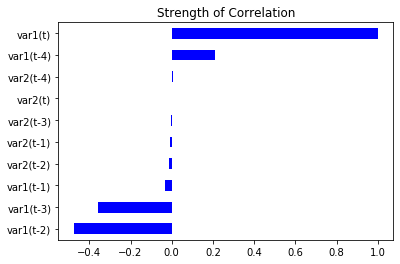

In [6]:
corr = reframed.corrwith(reframed['var1(t)'])
corr.sort_values().plot.barh(color = 'blue',title = 'Strength of Correlation')

In [7]:
# split into train and test sets
values = reframed.values
train = values[:1400, :]
val = values[1400:1525, :]
test = values[1525:, :]
# train_y = y[:150]
# test_y = y[150:]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
val_X, val_y = val[:, :-1], val[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
val_X = val_X.reshape((val_X.shape[0], 1, val_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
# train_y = train_y.reshape((train_y.shape[0], 1, 1))
# test_y = test_y.reshape((test_y.shape[0], 1, 1))
print(train_X.shape, train_y.shape, val_X.shape, val_y.shape, test_X.shape, test_y.shape)

(1400, 1, 9) (1400,) (125, 1, 9) (125,) (244, 1, 9) (244,)


In [8]:
train_X

array([[[0.75      , 0.6537143 , 1.        , ..., 0.25      ,
         0.67085713, 0.5       ]],

       [[1.        , 0.6514286 , 0.        , ..., 0.5       ,
         0.6685714 , 0.75      ]],

       [[0.        , 0.6605714 , 0.25      , ..., 0.75      ,
         0.63771427, 1.        ]],

       ...,

       [[0.        , 0.7542857 , 0.25      , ..., 0.75      ,
         0.75885713, 1.        ]],

       [[0.25      , 0.75474286, 0.5       , ..., 1.        ,
         0.75839996, 0.        ]],

       [[0.5       , 0.75474286, 0.75      , ..., 0.        ,
         0.7451429 , 0.25      ]]], dtype=float32)

In [9]:
print(train_X)
train_y.shape

[[[0.75       0.6537143  1.         ... 0.25       0.67085713 0.5       ]]

 [[1.         0.6514286  0.         ... 0.5        0.6685714  0.75      ]]

 [[0.         0.6605714  0.25       ... 0.75       0.63771427 1.        ]]

 ...

 [[0.         0.7542857  0.25       ... 0.75       0.75885713 1.        ]]

 [[0.25       0.75474286 0.5        ... 1.         0.75839996 0.        ]]

 [[0.5        0.75474286 0.75       ... 0.         0.7451429  0.25      ]]]


(1400,)

In [10]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.regularizers import L1L2

Using TensorFlow backend.


In [11]:
from keras import backend as K

def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [19]:

model = Sequential() 
model.add(LSTM(units = 128, return_sequences = True, input_shape=(train_X.shape[1], train_X.shape[2]), bias_regularizer=L1L2(l1=0.001, l2=0.001))) 
model.add(Dropout(0.5))

model.add(LSTM(units = 64)) 
model.add(Dropout(0.5))

model.add(Dense(units=16,init='uniform',activation='relu'))

model.add(Dense(units = 1)) 
model.compile(optimizer = 'adam', loss = root_mean_squared_error)
history = model.fit(train_X, train_y, epochs = 1000, batch_size=50, validation_data=(val_X, val_y), verbose=2, shuffle=False)

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(units=16, activation="relu", kernel_initializer="uniform")`
  


Train on 1400 samples, validate on 125 samples
Epoch 1/1000
 - 2s - loss: 0.8109 - val_loss: 0.3771
Epoch 2/1000
 - 0s - loss: 0.3655 - val_loss: 0.2697
Epoch 3/1000
 - 0s - loss: 0.3504 - val_loss: 0.2783
Epoch 4/1000
 - 0s - loss: 0.3323 - val_loss: 0.2506
Epoch 5/1000
 - 0s - loss: 0.3186 - val_loss: 0.2565
Epoch 6/1000
 - 0s - loss: 0.3033 - val_loss: 0.2297
Epoch 7/1000
 - 0s - loss: 0.2900 - val_loss: 0.2376
Epoch 8/1000
 - 0s - loss: 0.2801 - val_loss: 0.2318
Epoch 9/1000
 - 0s - loss: 0.2724 - val_loss: 0.2374
Epoch 10/1000
 - 0s - loss: 0.2647 - val_loss: 0.2379
Epoch 11/1000
 - 0s - loss: 0.2575 - val_loss: 0.2383
Epoch 12/1000
 - 0s - loss: 0.2606 - val_loss: 0.2315
Epoch 13/1000
 - 0s - loss: 0.2575 - val_loss: 0.1898
Epoch 14/1000
 - 0s - loss: 0.2442 - val_loss: 0.1815
Epoch 15/1000
 - 0s - loss: 0.2325 - val_loss: 0.1699
Epoch 16/1000
 - 0s - loss: 0.2243 - val_loss: 0.1593
Epoch 17/1000
 - 0s - loss: 0.2135 - val_loss: 0.1539
Epoch 18/1000
 - 0s - loss: 0.2079 - val_los

 - 0s - loss: 0.0647 - val_loss: 0.0326
Epoch 152/1000
 - 0s - loss: 0.0622 - val_loss: 0.0336
Epoch 153/1000
 - 0s - loss: 0.0638 - val_loss: 0.0320
Epoch 154/1000
 - 0s - loss: 0.0624 - val_loss: 0.0331
Epoch 155/1000
 - 0s - loss: 0.0637 - val_loss: 0.0325
Epoch 156/1000
 - 0s - loss: 0.0633 - val_loss: 0.0319
Epoch 157/1000
 - 0s - loss: 0.0633 - val_loss: 0.0324
Epoch 158/1000
 - 0s - loss: 0.0641 - val_loss: 0.0320
Epoch 159/1000
 - 0s - loss: 0.0643 - val_loss: 0.0307
Epoch 160/1000
 - 0s - loss: 0.0626 - val_loss: 0.0329
Epoch 161/1000
 - 0s - loss: 0.0613 - val_loss: 0.0327
Epoch 162/1000
 - 0s - loss: 0.0626 - val_loss: 0.0317
Epoch 163/1000
 - 0s - loss: 0.0615 - val_loss: 0.0328
Epoch 164/1000
 - 0s - loss: 0.0606 - val_loss: 0.0329
Epoch 165/1000
 - 0s - loss: 0.0626 - val_loss: 0.0319
Epoch 166/1000
 - 0s - loss: 0.0622 - val_loss: 0.0316
Epoch 167/1000
 - 0s - loss: 0.0628 - val_loss: 0.0308
Epoch 168/1000
 - 0s - loss: 0.0609 - val_loss: 0.0331
Epoch 169/1000
 - 0s - lo

 - 0s - loss: 0.0507 - val_loss: 0.0252
Epoch 301/1000
 - 0s - loss: 0.0514 - val_loss: 0.0282
Epoch 302/1000
 - 0s - loss: 0.0509 - val_loss: 0.0276
Epoch 303/1000
 - 0s - loss: 0.0501 - val_loss: 0.0220
Epoch 304/1000
 - 0s - loss: 0.0502 - val_loss: 0.0238
Epoch 305/1000
 - 0s - loss: 0.0530 - val_loss: 0.0271
Epoch 306/1000
 - 0s - loss: 0.0493 - val_loss: 0.0250
Epoch 307/1000
 - 0s - loss: 0.0519 - val_loss: 0.0228
Epoch 308/1000
 - 0s - loss: 0.0505 - val_loss: 0.0229
Epoch 309/1000
 - 0s - loss: 0.0502 - val_loss: 0.0245
Epoch 310/1000
 - 0s - loss: 0.0501 - val_loss: 0.0267
Epoch 311/1000
 - 0s - loss: 0.0533 - val_loss: 0.0254
Epoch 312/1000
 - 0s - loss: 0.0481 - val_loss: 0.0249
Epoch 313/1000
 - 0s - loss: 0.0500 - val_loss: 0.0222
Epoch 314/1000
 - 0s - loss: 0.0496 - val_loss: 0.0259
Epoch 315/1000
 - 0s - loss: 0.0513 - val_loss: 0.0261
Epoch 316/1000
 - 0s - loss: 0.0486 - val_loss: 0.0222
Epoch 317/1000
 - 0s - loss: 0.0506 - val_loss: 0.0261
Epoch 318/1000
 - 0s - lo

 - 0s - loss: 0.0398 - val_loss: 0.0132
Epoch 450/1000
 - 0s - loss: 0.0388 - val_loss: 0.0149
Epoch 451/1000
 - 0s - loss: 0.0399 - val_loss: 0.0163
Epoch 452/1000
 - 0s - loss: 0.0397 - val_loss: 0.0128
Epoch 453/1000
 - 0s - loss: 0.0390 - val_loss: 0.0129
Epoch 454/1000
 - 0s - loss: 0.0381 - val_loss: 0.0128
Epoch 455/1000
 - 0s - loss: 0.0372 - val_loss: 0.0139
Epoch 456/1000
 - 0s - loss: 0.0384 - val_loss: 0.0129
Epoch 457/1000
 - 0s - loss: 0.0385 - val_loss: 0.0146
Epoch 458/1000
 - 0s - loss: 0.0391 - val_loss: 0.0130
Epoch 459/1000
 - 0s - loss: 0.0381 - val_loss: 0.0126
Epoch 460/1000
 - 0s - loss: 0.0377 - val_loss: 0.0143
Epoch 461/1000
 - 0s - loss: 0.0392 - val_loss: 0.0133
Epoch 462/1000
 - 0s - loss: 0.0383 - val_loss: 0.0127
Epoch 463/1000
 - 0s - loss: 0.0383 - val_loss: 0.0147
Epoch 464/1000
 - 0s - loss: 0.0388 - val_loss: 0.0129
Epoch 465/1000
 - 0s - loss: 0.0386 - val_loss: 0.0139
Epoch 466/1000
 - 0s - loss: 0.0381 - val_loss: 0.0136
Epoch 467/1000
 - 0s - lo

 - 0s - loss: 0.0351 - val_loss: 0.0165
Epoch 599/1000
 - 0s - loss: 0.0360 - val_loss: 0.0129
Epoch 600/1000
 - 0s - loss: 0.0351 - val_loss: 0.0129
Epoch 601/1000
 - 0s - loss: 0.0373 - val_loss: 0.0171
Epoch 602/1000
 - 0s - loss: 0.0354 - val_loss: 0.0128
Epoch 603/1000
 - 0s - loss: 0.0353 - val_loss: 0.0145
Epoch 604/1000
 - 0s - loss: 0.0355 - val_loss: 0.0148
Epoch 605/1000
 - 0s - loss: 0.0362 - val_loss: 0.0162
Epoch 606/1000
 - 0s - loss: 0.0360 - val_loss: 0.0148
Epoch 607/1000
 - 0s - loss: 0.0353 - val_loss: 0.0159
Epoch 608/1000
 - 0s - loss: 0.0356 - val_loss: 0.0135
Epoch 609/1000
 - 0s - loss: 0.0350 - val_loss: 0.0141
Epoch 610/1000
 - 0s - loss: 0.0351 - val_loss: 0.0175
Epoch 611/1000
 - 0s - loss: 0.0353 - val_loss: 0.0123
Epoch 612/1000
 - 0s - loss: 0.0352 - val_loss: 0.0155
Epoch 613/1000
 - 0s - loss: 0.0349 - val_loss: 0.0142
Epoch 614/1000
 - 0s - loss: 0.0346 - val_loss: 0.0147
Epoch 615/1000
 - 0s - loss: 0.0347 - val_loss: 0.0133
Epoch 616/1000
 - 0s - lo

 - 0s - loss: 0.0338 - val_loss: 0.0140
Epoch 748/1000
 - 0s - loss: 0.0336 - val_loss: 0.0123
Epoch 749/1000
 - 0s - loss: 0.0338 - val_loss: 0.0173
Epoch 750/1000
 - 0s - loss: 0.0343 - val_loss: 0.0165
Epoch 751/1000
 - 0s - loss: 0.0338 - val_loss: 0.0136
Epoch 752/1000
 - 0s - loss: 0.0348 - val_loss: 0.0177
Epoch 753/1000
 - 0s - loss: 0.0341 - val_loss: 0.0134
Epoch 754/1000
 - 0s - loss: 0.0337 - val_loss: 0.0141
Epoch 755/1000
 - 0s - loss: 0.0369 - val_loss: 0.0140
Epoch 756/1000
 - 0s - loss: 0.0341 - val_loss: 0.0137
Epoch 757/1000
 - 0s - loss: 0.0339 - val_loss: 0.0149
Epoch 758/1000
 - 0s - loss: 0.0342 - val_loss: 0.0154
Epoch 759/1000
 - 0s - loss: 0.0342 - val_loss: 0.0137
Epoch 760/1000
 - 0s - loss: 0.0334 - val_loss: 0.0148
Epoch 761/1000
 - 0s - loss: 0.0337 - val_loss: 0.0143
Epoch 762/1000
 - 0s - loss: 0.0351 - val_loss: 0.0134
Epoch 763/1000
 - 0s - loss: 0.0333 - val_loss: 0.0153
Epoch 764/1000
 - 0s - loss: 0.0341 - val_loss: 0.0141
Epoch 765/1000
 - 0s - lo

 - 0s - loss: 0.0320 - val_loss: 0.0128
Epoch 897/1000
 - 0s - loss: 0.0344 - val_loss: 0.0140
Epoch 898/1000
 - 0s - loss: 0.0335 - val_loss: 0.0117
Epoch 899/1000
 - 0s - loss: 0.0325 - val_loss: 0.0155
Epoch 900/1000
 - 0s - loss: 0.0349 - val_loss: 0.0134
Epoch 901/1000
 - 0s - loss: 0.0322 - val_loss: 0.0134
Epoch 902/1000
 - 0s - loss: 0.0328 - val_loss: 0.0137
Epoch 903/1000
 - 0s - loss: 0.0364 - val_loss: 0.0119
Epoch 904/1000
 - 0s - loss: 0.0331 - val_loss: 0.0115
Epoch 905/1000
 - 0s - loss: 0.0325 - val_loss: 0.0125
Epoch 906/1000
 - 0s - loss: 0.0320 - val_loss: 0.0118
Epoch 907/1000
 - 0s - loss: 0.0328 - val_loss: 0.0126
Epoch 908/1000
 - 0s - loss: 0.0323 - val_loss: 0.0138
Epoch 909/1000
 - 0s - loss: 0.0329 - val_loss: 0.0113
Epoch 910/1000
 - 0s - loss: 0.0328 - val_loss: 0.0157
Epoch 911/1000
 - 0s - loss: 0.0325 - val_loss: 0.0118
Epoch 912/1000
 - 0s - loss: 0.0319 - val_loss: 0.0129
Epoch 913/1000
 - 0s - loss: 0.0340 - val_loss: 0.0138
Epoch 914/1000
 - 0s - lo

predicted_stock_price = model.predict(test_X, batch_size = 50)
plt.plot(test_y, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.savefig('predicted_stock_priceday1.png')
plt.show()

val1 = predicted_stock_price.reshape(80,1)
val1 = scaler.inverse_transform(val1)
val2 = test_y.reshape(80,1)
val2 = scaler.inverse_transform(val2)
print()




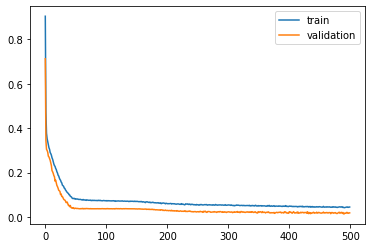

In [17]:
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='validation')
plt.legend()
plt.show()

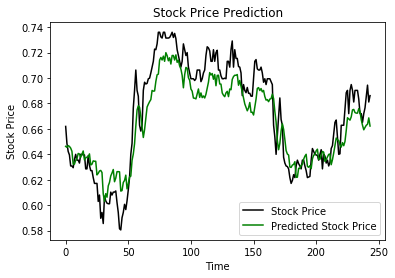

0.0026990026


0.051951926

In [18]:
# plt.plot(val2, color = 'black', label = 'Stock Price')
# plt.plot(val1, color = 'green', label = 'Predicted Stock Price')
# plt.title('Stock Price Prediction')
# plt.xlabel('Time')
# plt.ylabel('Stock Price')
# plt.legend()
# plt.savefig('predicted_stock_priceday1.png')
# plt.show()
predicted_stock_price = model.predict(test_X, batch_size = 25)
plt.plot(test_y, color = 'black', label = 'Stock Price')
plt.plot(predicted_stock_price, color = 'green', label = 'Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()
print(np.mean(np.power((np.array(test_y)-np.array(predicted_stock_price)),2)))
rms=np.sqrt(np.mean(np.power((np.array(test_y)-np.array(predicted_stock_price)),2)))
rms

In [147]:
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

print(train_X.shape)
# val_X = np.squeeze(val_X, axis=1)
print(val_X.shape)
train_X = np.squeeze(train_X, axis=1)
val_X = np.squeeze(val_X, axis=1)



(1400, 1, 4)
(125, 1, 4)


In [52]:
model = Sequential()
model.add(Dense(128, input_dim=4, kernel_initializer='normal', activation='relu'))
model.add(Dense(1, kernel_initializer='normal', activation='relu'))
# Compile model
model.compile(optimizer = 'adam', loss = root_mean_squared_error)
history = model.fit(train_X, train_y, epochs = 300, batch_size=50, validation_data=(val_X, val_y), verbose=2, shuffle=False)

Train on 1300 samples, validate on 125 samples
Epoch 1/300
 - 2s - loss: 0.4946 - val_loss: 0.3567
Epoch 2/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 3/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 4/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 5/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 6/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 7/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 8/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 9/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 10/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 11/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 12/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 13/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 14/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 15/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 16/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 17/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 18/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 19

Epoch 154/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 155/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 156/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 157/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 158/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 159/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 160/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 161/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 162/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 163/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 164/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 165/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 166/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 167/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 168/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 169/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 170/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 171/300
 - 0s - loss: 0.4946 - val_loss: 0.3567
Epoch 172/300
 - 0s - loss: 

In [32]:
arr = np.ndarray(shape=(1,1), dtype=float, order='F')
arr[0] = 0.019
print(arr[0])
print(scaler.inverse_transform(arr))

[0.019]
[[4.15625004]]
